In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# <p style="color: #6c89c6;">Работу выполнил: Таратин Артём ПМ22-1</p>

In [2]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [3]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


In [4]:
pd.DataFrame(X)[0][:100]

0     1.863411
1    -1.530997
2    -0.017224
3    -2.032039
4     4.620555
        ...   
95    1.700597
96   -1.949316
97   -2.106932
98   -2.796078
99   -0.700252
Name: 0, Length: 100, dtype: float64

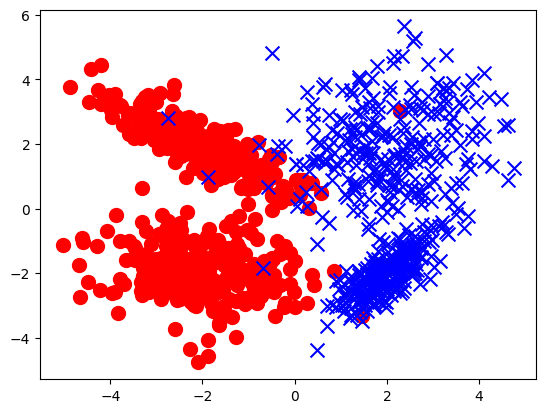

In [5]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [6]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [7]:
class LogReg(SGD):
    def __init__(self, alpha=0.5, n_iters=1000):
        super().__init__(alpha, n_iters)
    
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [8]:
logreg = LogReg()

In [9]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
X[:5]

array([[ 1.        ,  1.86341137,  0.08764555],
       [ 1.        , -1.53099717,  1.90118241],
       [ 1.        , -0.01722404, -2.59111159],
       [ 1.        , -2.03203853, -1.80116218],
       [ 1.        ,  4.6205548 ,  0.90112355]])

In [10]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [11]:
from sklearn.metrics import accuracy_score, f1_score, r2_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [12]:
y_pred_proba = logreg.predict_proba(X)

In [13]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [14]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

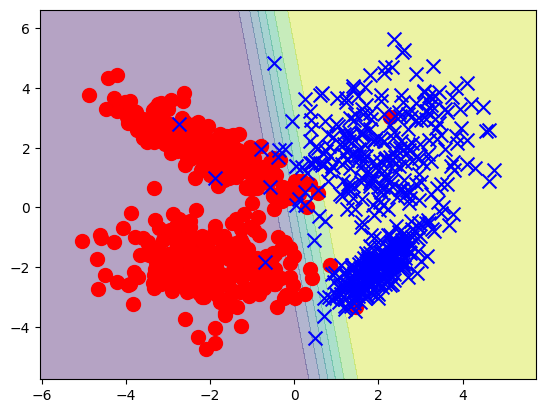

In [15]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)
plt.show()

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X, y)
y_pred_lr = model.predict(X)
y_pred_lr[:100]

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0])

### 1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [18]:
accuracy = accuracy_score(y, y_pred_lr)
f1 = f1_score(y, y_pred_lr)
r2 = r2_score(y, y_pred_lr)
accuracy, f1, r2

(0.976, 0.9761431411530815, 0.903999615998464)

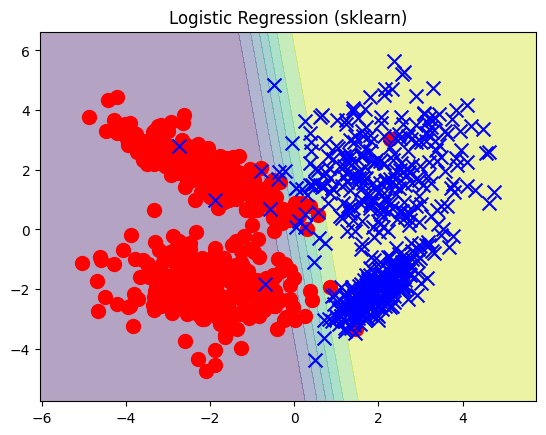

In [19]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01)
)
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

Z = model.predict_proba(XX)[:, 1].reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y == 0], X[:, 2][y == 0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1], marker="x", c='b', s=100)
plt.title("Logistic Regression (sklearn)")
plt.show()

### 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [20]:
logreg2 = LogReg(10**-2, 10**2)
logreg2.fit(X, y)
y_pred2 = logreg2.predict(X)

In [21]:
ac = accuracy_score(y, y_pred2)
f1 = f1_score(y, y_pred2)
r2 = r2_score(y, y_pred2)
print(f'{ac:.2f} | {f1:.2f} | {r2:.2f}')

0.92 | 0.92 | 0.66


In [22]:
alphas = 10**np.arange(-8, 9, step=2, dtype=float)
steps = np.arange(200, 2001, 500)
results = []

for alpha in alphas:
    for step in steps:
        logreg = LogReg(alpha=alpha, n_iters=step)
        logreg.fit(X, y)
        y_pred = logreg.predict(X)
        ac = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        r2 = r2_score(y, y_pred)
        results.append((alpha, step, ac, f1, r2))

results

/var/folders/02/6cj0f5qn4y30_4fdyfzy3vnh0000gn/T/ipykernel_38509/554361862.py:6: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))
/var/folders/02/6cj0f5qn4y30_4fdyfzy3vnh0000gn/T/ipykernel_38509/554361862.py:6: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))
/var/folders/02/6cj0f5qn4y30_4fdyfzy3vnh0000gn/T/ipykernel_38509/554361862.py:6: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))
/var/folders/02/6cj0f5qn4y30_4fdyfzy3vnh0000gn/T/ipykernel_38509/554361862.py:6: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))
/var/folders/02/6cj0f5qn4y30_4fdyfzy3vnh0000gn/T/ipykernel_38509/554361862.py:6: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))
/var/folders/02/6cj0f5qn4y30_4fdyfzy3vnh0000gn/T/ipykernel_38509/554361862.py:6: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))
/var/folders/02/

[(1e-08, 200, 0.706, 0.7521079258010118, -0.17600470401881618),
 (1e-08, 700, 0.706, 0.7521079258010118, -0.17600470401881618),
 (1e-08, 1200, 0.706, 0.7521079258010118, -0.17600470401881618),
 (1e-08, 1700, 0.706, 0.7521079258010118, -0.17600470401881618),
 (1e-06, 200, 0.706, 0.7521079258010118, -0.17600470401881618),
 (1e-06, 700, 0.706, 0.7521079258010118, -0.17600470401881618),
 (1e-06, 1200, 0.706, 0.7521079258010118, -0.17600470401881618),
 (1e-06, 1700, 0.707, 0.7531592249368155, -0.17200468801875224),
 (0.0001, 200, 0.712, 0.7571669477234402, -0.1520046080184323),
 (0.0001, 700, 0.722, 0.7655986509274874, -0.11200444801779219),
 (0.0001, 1200, 0.74, 0.7796610169491525, -0.04000416001664031),
 (0.0001, 1700, 0.758, 0.7935153583617748, 0.03199612798451179),
 (0.01, 200, 0.949, 0.9511961722488038, 0.795999183996736),
 (0.01, 700, 0.967, 0.9678048780487805, 0.867999471997888),
 (0.01, 1200, 0.974, 0.974459724950884, 0.895999583998336),
 (0.01, 1700, 0.977, 0.977295162882527, 0.907

### 3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [23]:
def fit2(self, X, y):
    X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
    m = X_with_bias.shape[1]
    start_b = np.zeros(m)
    self.b = self.optimize(X_with_bias, y, start_b, self._n_iters)

SGD.fit2 = fit2

### 4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

1 - class_sep = 0.1: accuracy = 0.548, f1 = 0.5577, r2 = -0.808
2 - class_sep = 0.5: accuracy = 0.706, f1 = 0.7129, r2 = -0.176
3 - class_sep = 1: accuracy = 0.853, f1 = 0.8555, r2 = 0.412
4 - class_sep = 2: accuracy = 0.976, f1 = 0.9761, r2 = 0.904
5 - class_sep = 3: accuracy = 0.995, f1 = 0.995, r2 = 0.98
6 - class_sep = 4: accuracy = 0.997, f1 = 0.997, r2 = 0.988


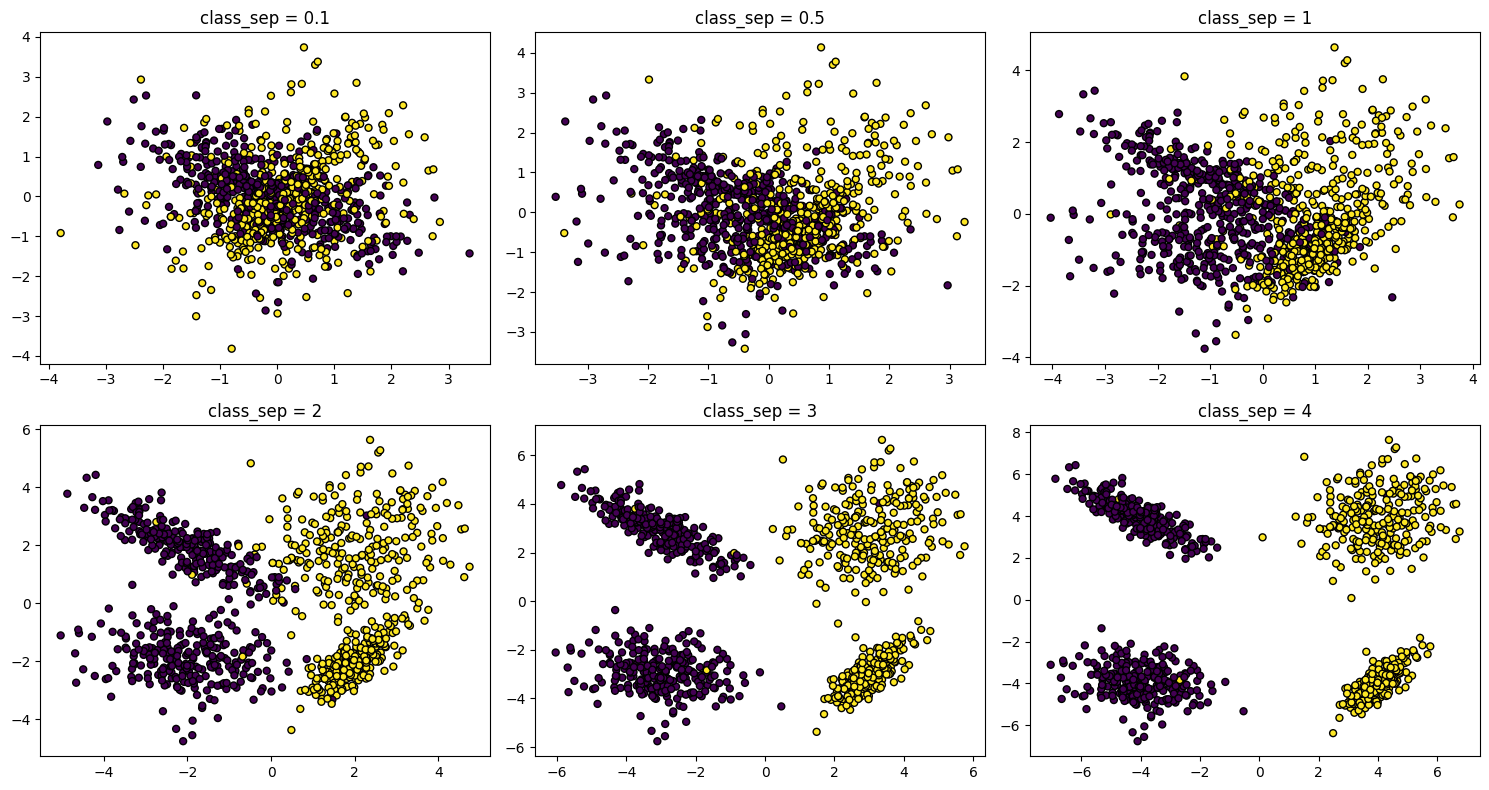

In [37]:
class_sep_values = [0.1, 0.5, 1, 2, 3, 4]
plt.figure(figsize=(15, 8))

for i, class_sep in enumerate(class_sep_values, 1):
    X, y = make_classification(n_samples=1000,
                               n_features=2,
                               n_informative=2,
                               n_redundant=0,
                               n_classes=2,
                               class_sep=class_sep,
                               random_state=1)
    
    model = LogisticRegression()

    plt.subplot(2, 3, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=25, edgecolor='k')
    plt.title(f'class_sep = {class_sep}')
    
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

    model.fit(X, y)
    
    y_pred_lr = model.predict(X)
    accuracy = accuracy_score(y, y_pred_lr)

    f1 = f1_score(y, y_pred_lr)
    r2 = r2_score(y, y_pred_lr)
    
    print(f'{i} - class_sep = {class_sep}: accuracy = {round(accuracy, 4)}, f1 = {round(f1, 4)}, r2 = {round(r2, 4)}')

plt.tight_layout()
plt.show()

### 5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [25]:
X_large, y_large = make_classification(n_samples=1000,
                                       n_features=10,
                                       n_informative=2,
                                       n_redundant=0,
                                       n_classes=2,
                                       class_sep=2,
                                       random_state=1)

In [26]:
logreg_large = LogReg()
logreg_large.fit(X_large, y_large)
y_pred_large = logreg_large.predict(X_large)

In [27]:
accuracy_large = accuracy_score(y_large, y_pred_large)
f1_large = f1_score(y_large, y_pred_large)

accuracy_large, f1_large

(0.979, 0.979187314172448)

### 6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [28]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [29]:
X, y = make_classification(n_samples=1000,
                            n_features=4,
                            n_informative=4,
                            n_redundant=0,
                            n_classes=3,
                            class_sep=5,
                            random_state=1)

In [30]:
model = OneVsRestClassifier(SVC())

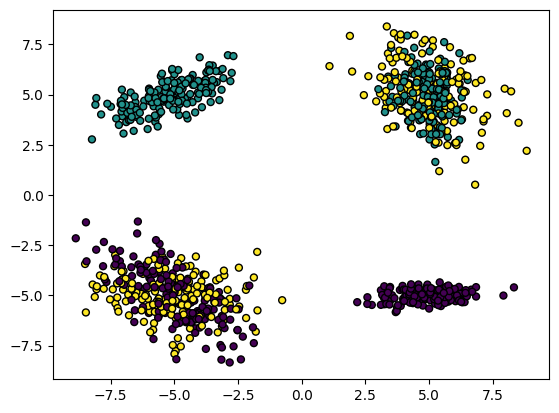

In [31]:
model.fit(X, y)
prediction = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=prediction, s=25, edgecolor='k')

### 7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

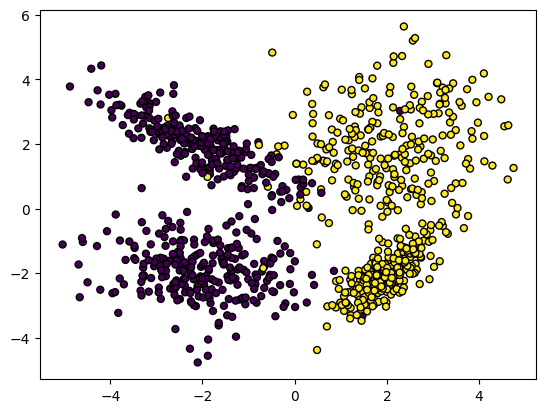

In [32]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor='k')
plt.show()

In [33]:
model = LogisticRegression()
model.fit(X, y)

model.predict_proba(X)

array([[3.76134350e-03, 9.96238656e-01],
       [9.86150956e-01, 1.38490435e-02],
       [7.93291865e-01, 2.06708135e-01],
       ...,
       [1.38915208e-04, 9.99861085e-01],
       [9.97398412e-01, 2.60158762e-03],
       [9.96372825e-01, 3.62717529e-03]])